# 案例、 keras版本模型训练

相关函数
* 构建模型 (顺序模型、函数式模型、子类模型）
* 模型训练: model.fit()
* 模型验证: model.evaluate()
* 模型预测：model.predict()

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


## 1.1构建模型

In [3]:
inputs = tf.keras.Input(shape=(32,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10)(x)

In [4]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

提供许多内置的优化器，损失和指标 <br>
优化器:
* SGD()
* RMSprop()
* Adam()
损失：
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
指标：
* AUC()
* Precision()
* Recall()

也可通过字符串标识符指定优化器、损失和指标

In [5]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [24]:
import numpy as np
x_train = np.random.random((1000, 32))
y_train = np.random.randint(10, size=(1000,))
x_val = np.random.random((200, 32))
y_val = np.random.randint(10, size=(200,))
x_test = np.random.random((200, 32))
y_test = np.random.randint(10, size=(200,))

## 1.2 模型训练
通过将数据切成大小为'batch_size'的‘批’来训练模型，并针对给定数量的“epoch”重复遍历整个数据集

In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.3081 - accuracy: 0.1210 - val_loss: 2.3347 - val_accuracy: 0.0750
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 2.2966 - accuracy: 0.1200 - val_loss: 2.3443 - val_accuracy: 0.0750
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.2864 - accuracy: 0.1420 - val_loss: 2.3389 - val_accuracy: 0.0700
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.2773 - accuracy: 0.1400 - val_loss: 2.3444 - val_accuracy: 0.0800
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 2.2686 - accuracy: 0.1400 - val_loss: 2.3413 - val_accuracy: 0.0600


In [34]:
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.2, steps_per_epoch=10)

Epoch 1/2
10/10 [==============================] - 0s 6ms/step - loss: 2.2494 - accuracy: 0.1688 - val_loss: 2.2804 - val_accuracy: 0.1450
Epoch 2/2
10/10 [==============================] - 0s 6ms/step - loss: 2.2651 - accuracy: 0.1594 - val_loss: 2.2814 - val_accuracy: 0.1350


## 1.3 model验证

返回test loss和metrics

In [36]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('predictions shape:', predictions.shape)


# Evaluate on test data
2/2 [==============================] - 0s 1ms/step - loss: 2.3310 - accuracy: 0.0700
test loss, test acc: [2.331021785736084, 0.07000000029802322]

# Generate predictions for 3 samples
predictions shape: (3, 10)


# 案例2、使用样本加权和类别加权



除了输入数据和目标数据外，还可以在使用时将样本权重或类权重传递给模型fit：

从Numpy数据进行训练时，通过sample_weight和class_weight参数。从数据集训练时：通过使数据集返回一个元组(input_batch,target_batch,sample_weight_batch)。当所使用的权重为1和0时，该数组可用作损失函数的掩码（完全丢弃某些样本对总损失的贡献）

“类别权重”字典是同一个概念的一个更具体的实例：它将类别索引映射到应该用于属于该类别的样本的样本权重。例如，如果在数据中类“0”的表示量比类“1”的表示量少两倍，则可以使用class_weight={0:1.,1:0.5}

## 2.1 构建模型

In [41]:
def get_uncompiled_model():
    inputs = tf.keras.Input(shape=(32,), name='digits')
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = tf.keras.layers.Dense(10, name='predictions')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['sparse_categorical_accuracy'])
    return model

## 2.2 模型训练

In [42]:
import numpy as np

class_weight = {0: 1., 1: 1., 2: 1., 3:1., 4:1., 
                5:2.,
               6:1., 7:1.,8:1., 9:1.}
print('Fit with class weight')
model = get_compiled_model()
model.fit(x_train, y_train,
         class_weight=class_weight,
         batch_size=64,
         epochs=4)

Fit with class weight
Epoch 1/4
16/16 [==============================] - 0s 1ms/step - loss: 2.5440 - sparse_categorical_accuracy: 0.0840
Epoch 2/4
16/16 [==============================] - 0s 1ms/step - loss: 2.5092 - sparse_categorical_accuracy: 0.1060
Epoch 3/4
16/16 [==============================] - 0s 1ms/step - loss: 2.4978 - sparse_categorical_accuracy: 0.1120
Epoch 4/4
16/16 [==============================] - 0s 1ms/step - loss: 2.4877 - sparse_categorical_accuracy: 0.1070


In [45]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train==5] = 2.
print('\nFit with sample weight')

model = get_compiled_model()
model.fit(x_train, y_train,
         sample_weight=sample_weight,
         batch_size=64,
         epochs=4)


Fit with sample weight
Epoch 1/4
16/16 [==============================] - 0s 934us/step - loss: 2.5287 - sparse_categorical_accuracy: 0.1080
Epoch 2/4
16/16 [==============================] - 0s 1ms/step - loss: 2.5031 - sparse_categorical_accuracy: 0.1040
Epoch 3/4
16/16 [==============================] - 0s 1ms/step - loss: 2.4942 - sparse_categorical_accuracy: 0.1040
Epoch 4/4
16/16 [==============================] - 0s 1ms/step - loss: 2.4871 - sparse_categorical_accuracy: 0.1040


# 案例3、使用回调函数

* 在训练中不同时间点进行验证（除了内置的按时间段验证）
* 定期或在超过特定精度阈值对模型进行检查
* 当训练似乎停滞不前时，更改模型的学习率
* 当训练似乎停滞不前时，对顶层进行微调
* 在训练结束或超出特定性能阈值时发送邮件或通知。

## 3.1 EarlyStopping(早停)
* monitor: 被监测的数据。
* min_delta: 在被监测的数据中被认为是提升的最小变化，例如，小于min_delta的绝对变化会被认为没有提升
* patience: 没有进步的训练轮数，之后训练停止
* verbose: 详细信息模式
* mode: {auto, min, max}其中之一，min停止下降，max停止上升，auto自动从名字判断

In [47]:
model = get_compiled_model()

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience=2,
        verbose=1
    )
]

model.fit(x_train, y_train,
         epochs=20,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Epoch 1/20
13/13 [==============================] - 0s 8ms/step - loss: 2.3133 - sparse_categorical_accuracy: 0.1112 - val_loss: 2.3093 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 2.2922 - sparse_categorical_accuracy: 0.1213 - val_loss: 2.3074 - val_sparse_categorical_accuracy: 0.1100
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 2.2839 - sparse_categorical_accuracy: 0.1375 - val_loss: 2.3106 - val_sparse_categorical_accuracy: 0.0950
Epoch 00003: early stopping


#### 其他回调
- ModelCheckpoint
- TensorBoard
- CSVLogger

## 3.2 checkpoint模型

In [52]:
model = get_compiled_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='mymodel_{epoch}',
        save_best_only=True,
        monitor='val_loss',
        save_weights_only=True,
        verbose=1
    )
]

model.fit(x_train, y_train,
         epochs=5,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Epoch 1/5
 1/13 [=>............................] - ETA: 0s - loss: 2.3037 - sparse_categorical_accuracy: 0.1094
Epoch 00001: val_loss improved from inf to 2.30417, saving model to mymodel_1
13/13 [==============================] - 0s 9ms/step - loss: 2.3204 - sparse_categorical_accuracy: 0.0950 - val_loss: 2.3042 - val_sparse_categorical_accuracy: 0.1050
Epoch 2/5
 1/13 [=>............................] - ETA: 0s - loss: 2.2980 - sparse_categorical_accuracy: 0.0938
Epoch 00002: val_loss improved from 2.30417 to 2.30334, saving model to mymodel_2
13/13 [==============================] - 0s 5ms/step - loss: 2.3007 - sparse_categorical_accuracy: 0.1112 - val_loss: 2.3033 - val_sparse_categorical_accuracy: 0.1200
Epoch 3/5
 1/13 [=>............................] - ETA: 0s - loss: 2.2877 - sparse_categorical_accuracy: 0.1562
Epoch 00003: val_loss did not improve from 2.30334
13/13 [==============================] - 0s 3ms/step - loss: 2.2896 - sparse_categorical_accuracy: 0.1175 - val_loss: 2

## 3.3、使用回调实现动态学习率调整
ReduceLROnPlateau参数
* factor: 学习速率被降低的因素。新的学习速率=学习速率*因数
* cooldown: 在学习率被降低之后，重新恢复正常操作之前等待的训练轮数量
* min_lr: 学习速率的下边界

In [55]:
model = get_compiled_model()

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_sparse_categorical_accuracy",
        verbose=1,
        mode='max',
        factor=0.5,
        patience=3
    )
]

model.fit(x_train, y_train,
         epochs=10,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 0s 13ms/step - loss: 2.3222 - sparse_categorical_accuracy: 0.0900 - val_loss: 2.3127 - val_sparse_categorical_accuracy: 0.0950 - lr: 0.0010
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 2.2927 - sparse_categorical_accuracy: 0.1363 - val_loss: 2.3132 - val_sparse_categorical_accuracy: 0.1100 - lr: 0.0010
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 2.2831 - sparse_categorical_accuracy: 0.1425 - val_loss: 2.3201 - val_sparse_categorical_accuracy: 0.1000 - lr: 0.0010
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 2.2725 - sparse_categorical_accuracy: 0.1525 - val_loss: 2.3312 - val_sparse_categorical_accuracy: 0.0700 - lr: 0.0010
Epoch 5/10
 1/13 [=>............................] - ETA: 0s - loss: 2.2425 - sparse_categorical_accuracy: 0.1719
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
13/13 [==============================] - 0

# 案例4、将数据传递到多输入，多输出模型

In [56]:
image_input = tf.keras.Input(shape=(32, 32, 3), name='img_input')
timeseries_input = tf.keras.Input(shape=(20, 10), name='ts_input')

x1 = tf.keras.layers.Conv2D(3, 3)(image_input)
x1 = tf.keras.layers.GlobalMaxPool2D()(x1)

x2 = tf.keras.layers.Conv1D(3, 3)(timeseries_input)
x2 = tf.keras.layers.GlobalMaxPool1D()(x2)

x = tf.keras.layers.concatenate([x1, x2])

score_output = tf.keras.layers.Dense(1, name='score_output')(x)
class_output = tf.keras.layers.Dense(5, name='class_output')(x)

model = tf.keras.Model(inputs=[image_input, timeseries_input],
                      outputs=[score_output, class_output])

In [ ]:
help(tf.keras.utils.plot_model)

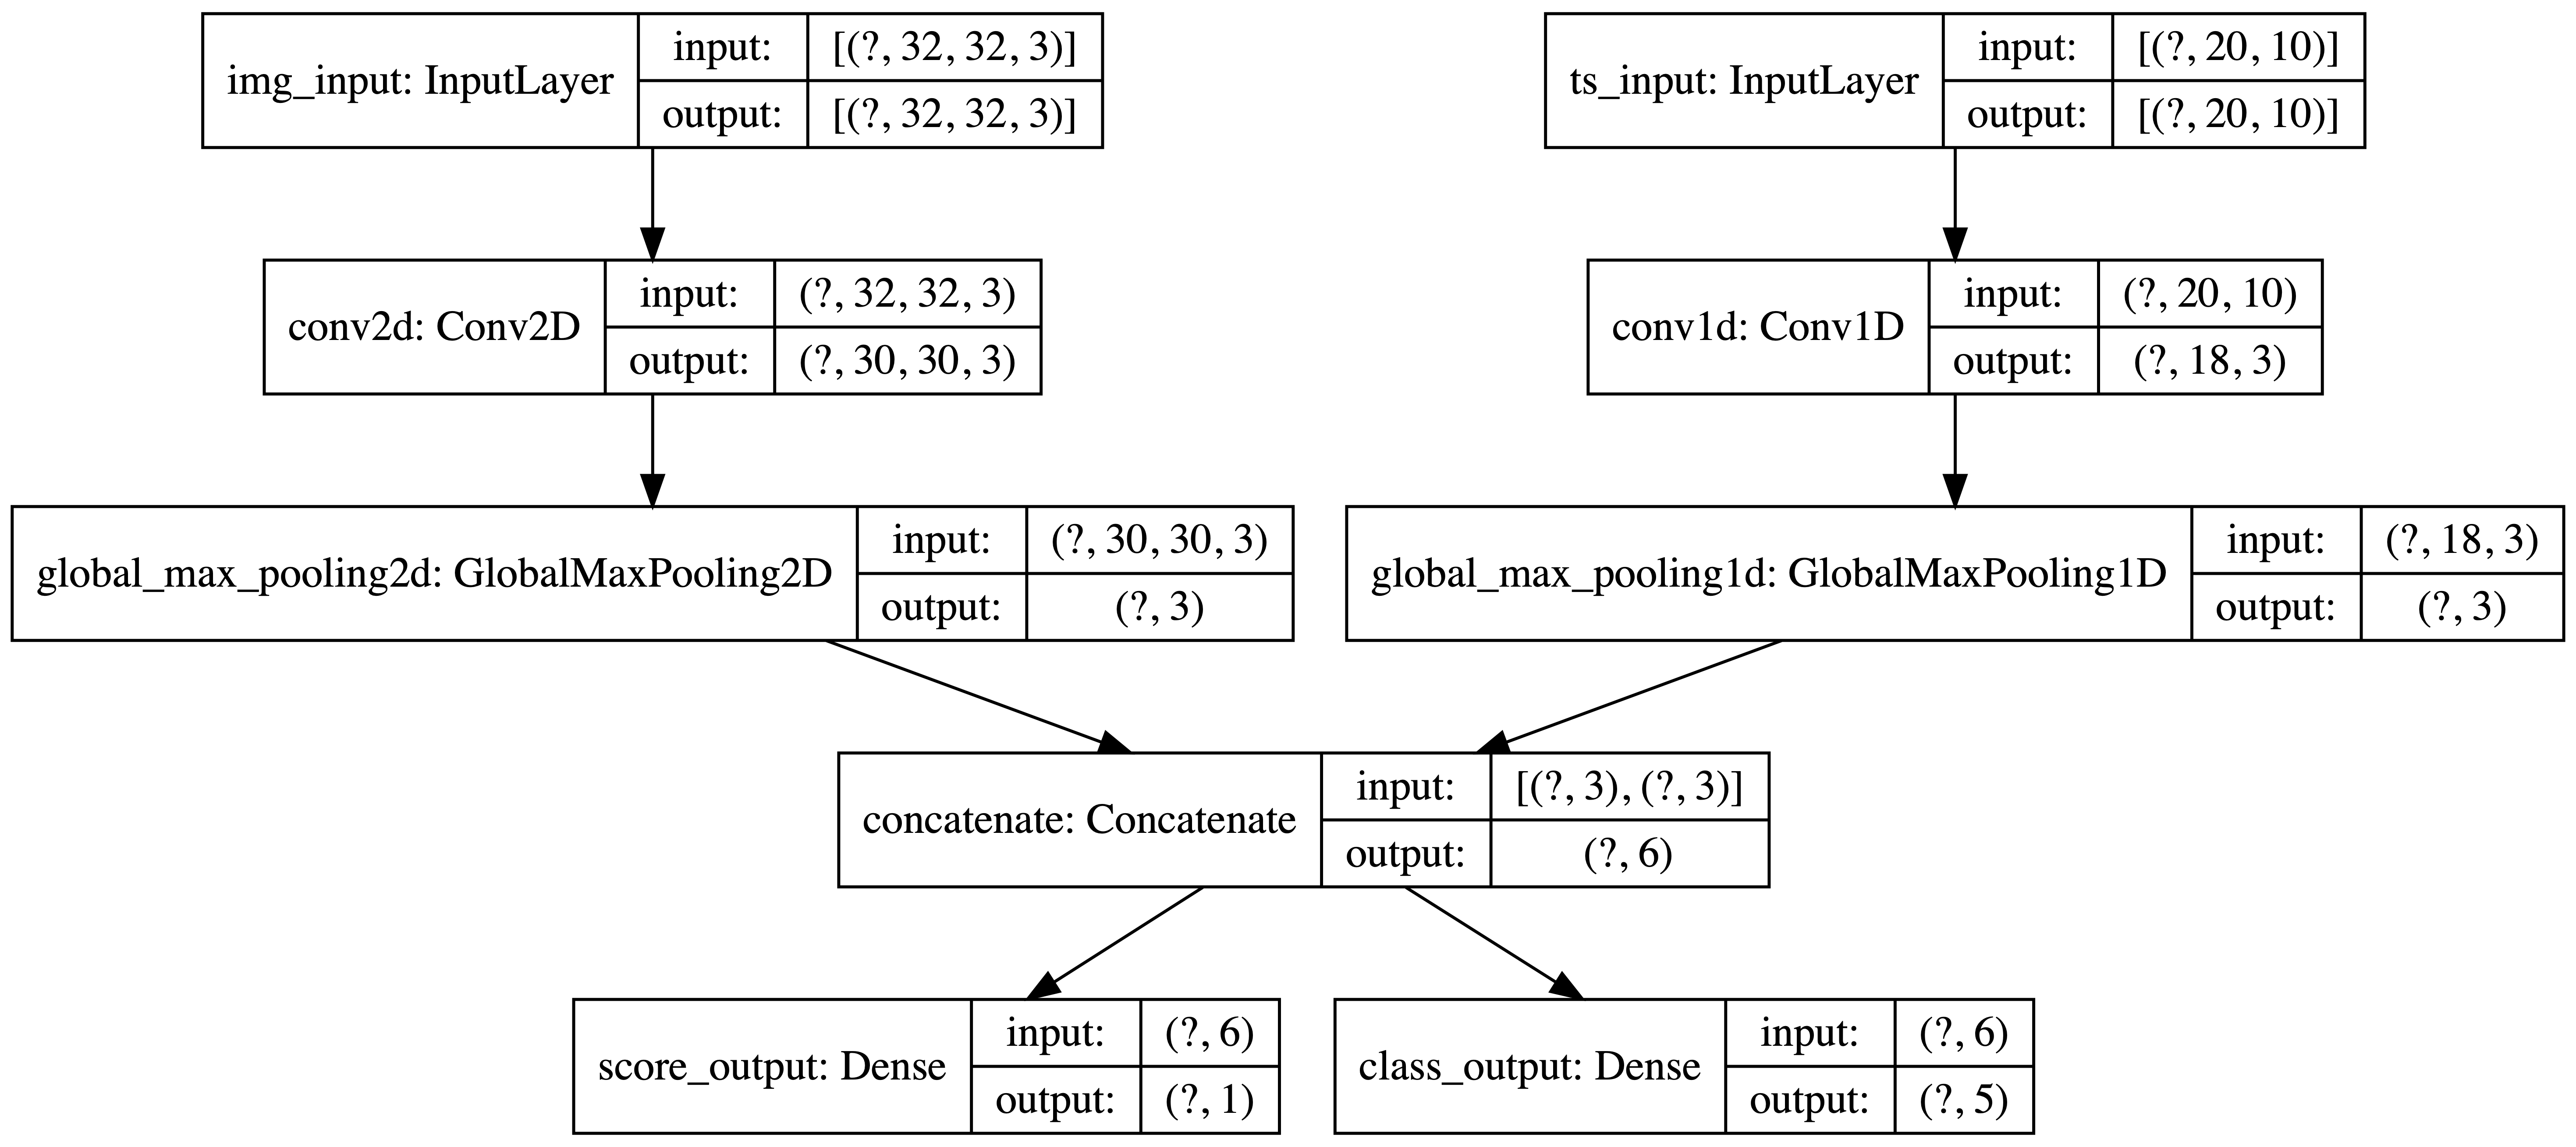

In [58]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True, dpi=500)

## 4.1 损失函数

In [59]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

## 4.2 指标函数

In [62]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
    metrics=[
        [tf.keras.metrics.MeanAbsolutePercentageError(),
        tf.keras.metrics.MeanAbsoluteError()],
        [tf.keras.metrics.CategoricalAccuracy()]
    ]
)

对输出层命名

In [63]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={
        'score_output':tf.keras.losses.MeanSquaredError(),
        'class_output':tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    },
    metrics={
        'score_output':[tf.keras.metrics.MeanAbsolutePercentageError(),
                        tf.keras.metrics.MeanAbsoluteError()],
        'class_output':[tf.keras.metrics.CategoricalAccuracy()]
    }
)

损失赋予不同的权重

In [65]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={
        'score_output':tf.keras.losses.MeanSquaredError(),
        'class_output':tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    },
    metrics={
        'score_output':[tf.keras.metrics.MeanAbsolutePercentageError(),
                        tf.keras.metrics.MeanAbsoluteError()],
        'class_output':[tf.keras.metrics.CategoricalAccuracy()]
    },
    loss_weights={'score_output':2., 'class_output':1.}
)

还可以选择不为某些输出计算损失，如果这些输出仅用于预测而不是训练：

In [66]:
# list
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[None,
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
)

# or dict
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=['class_output',
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
)

In [68]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

import numpy as np
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

model.fit([img_data, ts_data], [score_targets, class_targets],
         batch_size=32,
         epochs=3)

Epoch 1/3
4/4 [==============================] - 0s 3ms/step - loss: 14.4406 - score_output_loss: 7.9766 - class_output_loss: 6.4640
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 12.4664 - score_output_loss: 6.1284 - class_output_loss: 6.3379
Epoch 3/3
4/4 [==============================] - 0s 4ms/step - loss: 11.2858 - score_output_loss: 5.0405 - class_output_loss: 6.2452


In [70]:
# or
model.fit({'img_input': img_data, 'ts_input': ts_data},
         {'score_output':score_targets, 'class_output': class_targets},
         batch_size=32,
         epochs=3)

Epoch 1/3
4/4 [==============================] - 0s 4ms/step - loss: 10.3436 - score_output_loss: 4.1747 - class_output_loss: 6.1688
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 9.5842 - score_output_loss: 3.4821 - class_output_loss: 6.1021
Epoch 3/3
4/4 [==============================] - 0s 5ms/step - loss: 9.0143 - score_output_loss: 2.9378 - class_output_loss: 6.0764
